In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Model

In [1]:
# Define dataset paths
train_folder = "../dataset/logos_train"
test_folder = "../dataset/logos_test"

# Check if dataset directories exist
if not os.path.exists(train_folder) or not os.path.exists(test_folder):
    raise FileNotFoundError("Train or test directory not found. Please verify the path.")

NameError: name 'os' is not defined

In [ ]:
# Load Pretrained CNN (ResNet50) for feature extraction
base_model = ResNet50(weights="imagenet", include_top=False, pooling="avg", classifier_activation="softmax")
model = Model(inputs=base_model.input, outputs=base_model.output)

# Function to extract CNN features
def extract_cnn_features(image_path):
    img = load_img(image_path, target_size=(512, 512))  # Resize to match CNN input
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions for CNN
    img_array /= 255.0  # Normalize
    features = model.predict(img_array)
    return features.flatten()

# Function to process images and extract CNN features
def process_images(image_paths):
    features = []
    valid_paths = []
    for img_path in image_paths:
        feature_vector = extract_cnn_features(img_path)
        if feature_vector is not None:
            features.append(feature_vector)
            valid_paths.append(img_path)
    return valid_paths, np.array(features, dtype=np.float32) if features else (valid_paths, np.array([]))

In [ ]:
# Collect training image features
train_images = [os.path.join(train_folder, img) for img in os.listdir(train_folder)]
valid_train_images, X_train = process_images(train_images)

# Ensure features were extracted successfully
if X_train.size == 0:
    raise ValueError("No valid features extracted from training images.")

# Determine optimal clusters using Silhouette Score
cluster_range = range(2, 21)
silhouette_scores = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10, max_iter=500, tol=0.1, init='k-means++', algorithm="elkan")
    labels = kmeans.fit_predict(X_train)
    silhouette_scores.append(silhouette_score(X_train, labels))

# Find optimal number of clusters
optimal_clusters = cluster_range[np.argmax(silhouette_scores)]
best_silhouette_score = max(silhouette_scores)  # Store best silhouette score

# Train K-Means with optimal number of clusters
kmeans_final = KMeans(n_clusters=optimal_clusters, random_state=42, n_init=10, max_iter=200, tol=0.1, init='k-means++', algorithm="elkan")
train_labels = kmeans_final.fit_predict(X_train)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 645ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 535ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 483ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 420ms/step


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 655ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 681ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 465ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 433ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 470ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 400ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 399ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 396ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 455ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 426ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 493ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 445ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 431ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 395ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 417ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

In [ ]:
# Collect test image features
test_images = [os.path.join(test_folder, img) for img in os.listdir(test_folder)]
valid_test_images, X_test = process_images(test_images)

# Ensure features were extracted successfully
if X_test.size == 0:
    raise ValueError("No valid features extracted from test images.")

# Predict clusters for test images
test_labels = kmeans_final.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 440ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 436ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 438ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 473ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 432ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 427ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\PIL\Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 449ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 450ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 412ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 414ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 409ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 452ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 404ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 443ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 410ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 406ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 402ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 401ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 411ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 415ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 424ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 408ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 

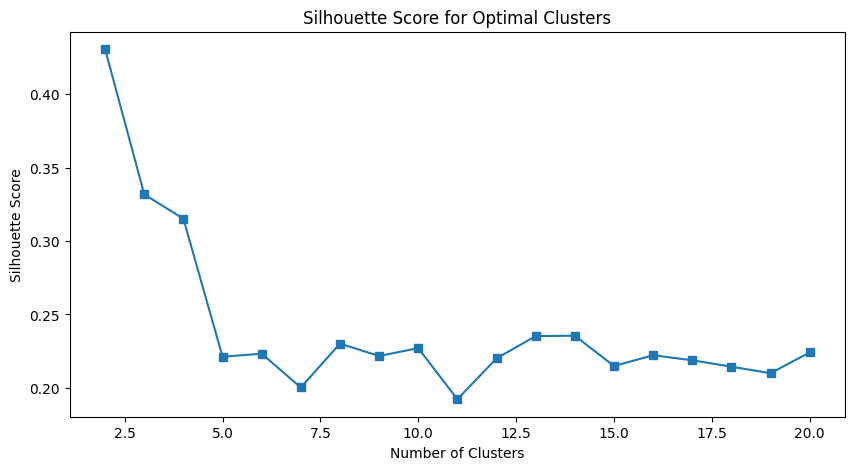

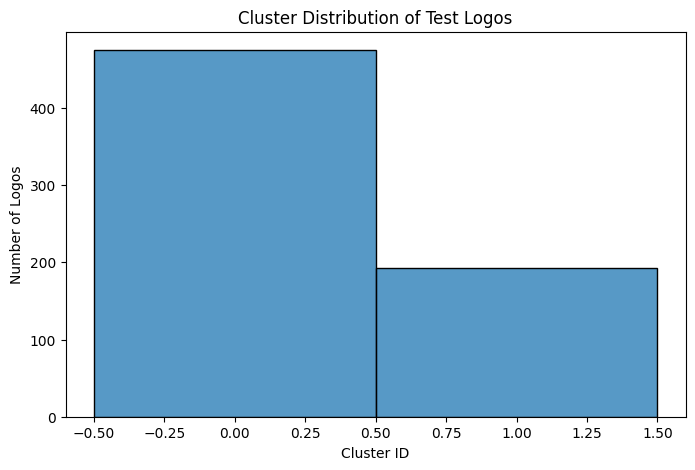

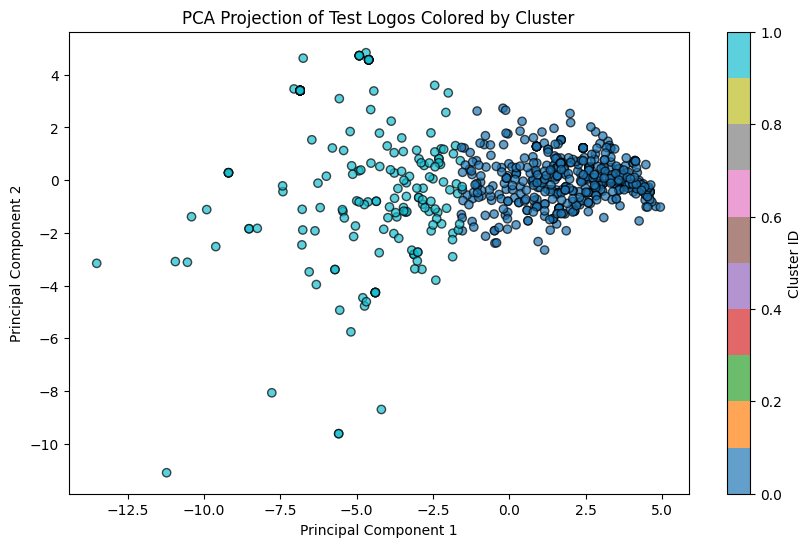

Optimal Number of Clusters: 2
Best Silhouette Score: 0.4307


In [ ]:

# 📊 Plot Silhouette Score to find optimal clusters
plt.figure(figsize=(10, 5))
plt.plot(cluster_range, silhouette_scores, marker='s', linestyle='-')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score for Optimal Clusters')
plt.show()

# 📊 Cluster Distribution Plot
plt.figure(figsize=(8, 5))
sns.histplot(test_labels, bins=optimal_clusters, kde=False, discrete=True)
plt.xlabel("Cluster ID")
plt.ylabel("Number of Logos")
plt.title("Cluster Distribution of Test Logos")
plt.show()

# 📊 PCA Projection for 2D visualization on test set
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=test_labels, cmap="tab10", alpha=0.7, edgecolors="k")
plt.colorbar(label="Cluster ID")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection of Test Logos Colored by Cluster")
plt.show()

# ✅ Print Results
print(f"Optimal Number of Clusters: {optimal_clusters}")
print(f"Best Silhouette Score: {best_silhouette_score:.4f}")
